In [3]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [4]:
url = 'https://fr.trustpilot.com/review/www.cdiscount.com'
html = requests.get(url)
html

<Response [200]>

In [104]:
# transformation de la page en un document exploitable
# Selon le parsers choisi (html.parser, lxml, lxml-xml, xml, html5lib)
soup = BeautifulSoup(html.text, 'html.parser')

# affichage de manière agencé avec la methode pretiffy
soup.prettify()

# Chercher à partir de la valeur d'une balise tous les éléments d'un commentaire
comment = soup.find_all('div', {"class" : "styles_cardWrapper__LcCPA styles_show__HUXRb styles_reviewCard__9HxJJ"})
print(comment[2].text)

MJMARTIN JEAN CLAUDE4 avisFRll y a 3 joursSur invitationdes bon produit livraison en bonne état…des bon produit livraison en bonne état et rapide merci a vousDate de l'expérience: 19 janvier 2023


In [138]:
# chercher dans la balise précédente les sous balises correspondant au pays, à la note et au commentaire

note = comment[0].find('div', {"class" : "styles_reviewHeader__iU9Px"})['data-service-review-rating']
print(note)

commentaire = comment[0].find('p').text
print(commentaire)

5
Date de l'expérience: 14 janvier 2023


In [5]:
from time import sleep
from time import time
t0 = time()

# recherche sur plusieurs pages
nb_pages = 6000
liste_url = []
page = 1
while page <= nb_pages :
    liste_url.append('https://fr.trustpilot.com/review/www.cdiscount.com?page='+str(page))
    page = page + 1

liste_note = []
liste_commentaire = []

for url in liste_url:
    html = requests.get(url)
    soup = BeautifulSoup(html.text, 'html.parser')
    comment = soup.find_all('div', {"class" : "styles_cardWrapper__LcCPA styles_show__HUXRb styles_reviewCard__9HxJJ"})
    for nb_avis in range(len(comment)):
        liste_note.append(comment[nb_avis].find('div', {"class" : "styles_reviewHeader__iU9Px"})['data-service-review-rating'])
        try :
            liste_commentaire.append(comment[nb_avis].find('p', {"class" : "typography_body-l__KUYFJ"}).text)
        except:
            liste_commentaire.append('NaN')
    sleep(2)

dico = {'note' : liste_note, 'commentaire' : liste_commentaire}
df = pd.DataFrame(dico)

print('le temps de calcul est de {:.2f} secondes'.format(time()-t0))

le temps de calcul est de 15230.77 secondes


In [7]:
df.tail(10)

,note,commentaire
119890,5,"depuis des années que j'achète sur Cdiscount, ..."
119891,5,comme toujours aucun souci avec je recommande ...
119892,5,NaN
119893,1,"Cdiscount est devenu une blague, trois command..."
119894,4,rien a dire a par pour le delais de livraison
119895,4,FRAIS DE LIVRAISON RESTENT TRES CHERS!!!!
119896,3,Je trouve désolant de découvrir les tarifs de ...
119897,5,NaN
119898,4,NaN
119899,4,NaN


C:\Users\t.fourtouill\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='note', ylabel='count'>

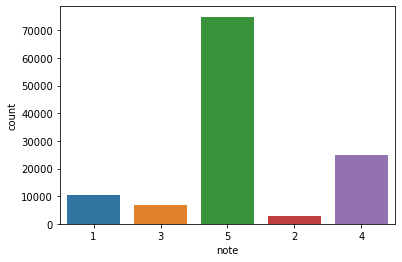

In [8]:
import seaborn as sns
sns.countplot(df['note'])

In [6]:
df.to_csv('datasets/SatisfactionClients/cdiscount.csv')